# import packages 

In [1]:
#import packages needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# load files 

In [2]:
#load data files 
df = pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_dnm.tsv")
df_ages= pd.read_csv("/Users/cmdb/qbb2020-answers/day5-lunch/aau1043_parental_age.tsv")


# make dataframes for maternal and paternal phase_combined

In [3]:
#separate the de novo mutations into mother and father, phase combined
maternal=df[df["Phase_combined"]=="mother"].value_counts()
paternal=df[df["Phase_combined"]=="father"].value_counts()

#total number of mutations 
tot_dnm=(df['Proband_id'].value_counts())

In [4]:
#store the three dataframes (maternal, paternal, and total) into a new dataframe 
# new dataframe needs output: Proband_id, pat_dnm, mat_dnm, tot_dnm


#CODE ADAPTED FROM GROUP 
#create a tabular data structure with pd.DataFrame for total de novo mutations 
tot=pd.DataFrame(df['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))

In [5]:
#create a tabular data structure with pd.DataFrame for maternal de novo mutations 
maternal_prime=pd.DataFrame(df['Proband_id'][df["Phase_combined"]=="mother"].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))

In [6]:
#create a tabular data structure with pd.DataFrame for paternal de novo mutations 
paternal_prime=pd.DataFrame(df['Proband_id'][df["Phase_combined"] == "father"].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))

# merge dataframes 

In [7]:
#merge dataframes to include mother and father age 
merge1= pd.DataFrame.merge(tot, maternal_prime, on ='Proband_id')
merge2= pd.DataFrame.merge(merge1, paternal_prime, on ='Proband_id')
final_merge= pd.DataFrame.merge(merge2, df_ages, on ='Proband_id')
final_merge

,Proband_id,tot_dnm,mat_dnm,pat_dnm,Father_age,Mother_age
0,91410,122,10,111,51,34
1,114094,121,22,98,51,44
2,111288,115,21,93,53,44
3,8147,114,27,78,40,33
4,88246,113,25,87,56,46
...,...,...,...,...,...,...
391,121087,37,1,36,18,17
392,62630,34,5,28,23,20
393,76504,34,5,27,19,17
394,37789,34,3,17,19,19


# plot the count of maternal de novo mutations vs. maternal age

(0.0, 60.0)

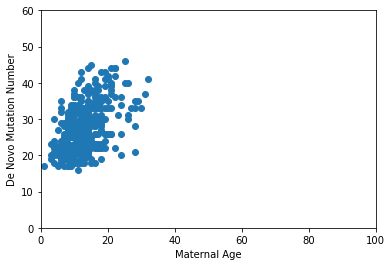

In [8]:
#scatter plot of mat_dnm and mother_age using final_merge 
fig, ax = plt.subplots()
ax.scatter(x=final_merge['mat_dnm'], y=final_merge['Mother_age'])
ax.set_xlabel('Maternal Age')
ax.set_ylabel('De Novo Mutation Number')
ax.set_xlim(0,100)
ax.set_ylim(0,60)

# plot the count of paternal de novo mutations vs. paternal age

(0.0, 60.0)

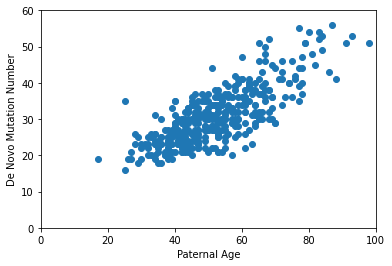

In [9]:
#scatter plot of pat_dnm and father_age using final_merge 
fig, ax = plt.subplots()
ax.scatter(x=final_merge['pat_dnm'], y=final_merge['Father_age'])
ax.set_xlabel('Paternal Age')
ax.set_ylabel('De Novo Mutation Number')
ax.set_xlim(0,100)
ax.set_ylim(0,60)

# Use ordinary least squares smf.ols() to test for an association between maternal age and maternally inherited de novo mutations.

In [10]:
#use ordinary least squares, code adapted from master notebook 
model=smf.ols(formula="mat_dnm-1 ~ Mother_age", data= final_merge)
results=model.fit()
results.summary()

#R-squared value is decent, maybe some correlation between maternal age and maternally inherited dnm's using ordinary least squares 
#coefficient value for intercept is positive
#for every year in age, there is 0.37 more mat_dnm present 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        09:49:05   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Use ordinary least squares smf.ols() to test for an association between paternal age and paternally inherited de novo mutations.¶

In [11]:
#use ordinary least squares, code adapted from master notebook 
model=smf.ols(formula="pat_dnm-1 ~ Father_age", data= final_merge)
results=model.fit()
results.summary()

#R-squared value is decent, maybe some correlation between paternal age and paternally inherited dnm's using ordinary least squares 
#coefficient value for intercept is positive
#for every year in age, there is 0.45 more pat_dnm present 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        09:49:05   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# histogram of Maternal vs. Paternal dnm's

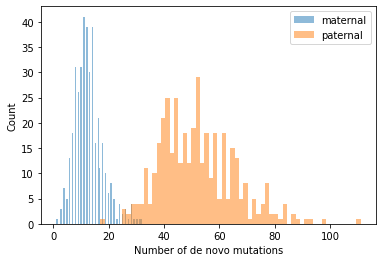

In [12]:
#make histogram with number of mat_dnm and pat_dnm per proband 
fig, ax= plt.subplots()
ax.hist(final_merge["mat_dnm"],bins=60,alpha=0.5, label= 'maternal')
ax.hist(final_merge["pat_dnm"],bins=60,alpha=0.5, label= 'paternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Count')
plt.legend()
plt.show()

# Test whether the number of maternally inherited de novo mutations per proband is significantly different than the number of paternally inherited de novo mutations per proband.

In [13]:
#run t-test to compare the two categories (maternally inherited dnm's and paternally inherited dnms)
stats.ttest_ind(final_merge['mat_dnm'],final_merge['pat_dnm']) 

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

# FITTING POISSON MODEL 

In [14]:
#fitting maternal data to poisson 
model=smf.poisson(formula= "mat_dnm ~1 + Mother_age", data=final_merge)
mat_poisson=model.fit()
mat_poisson.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        09:49:05   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [15]:
#fitting paternal data to poisson 
model=smf.poisson(formula= "pat_dnm ~1 + Father_age", data=final_merge)
pat_poisson=model.fit()
pat_poisson.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        09:49:05   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [16]:
#fitting histogram data to poisson (mat vs. pat)
model=smf.poisson(formula= "mat_dnm ~ 1+ pat_dnm", data=final_merge)
mat_vs_pat_poisson=model.fit()
mat_vs_pat_poisson.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        09:49:05   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dnm        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

# make predictions using poisson model

In [17]:
pat_poisson.params

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [18]:
#create equation using known parameters 
math.exp(3.190257+ 0.024096* 50.5)

82.03163782612788